In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
# Load Huggingface transformers

#libraries
import pandas as pd
import requests
import io
from  urllib.request import urlopen
import torch 
import numpy as np
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from statistics import mean , variance
import math
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
import seaborn as sns


# Importing stock ml libraries
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
import logging
logging.basicConfig(level=logging.ERROR)


In [3]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
full_data = pd.read_csv('./data/SNIPS.csv')
full_data.head()

,utterance,intent_label
0,play music on youtube,PlayMusic
1,play the song i get ideas as performed by rich...,PlayMusic
2,show weather while sunset in the same area in ...,GetWeather
3,is it freezing on jun the 21st in apshawa sout...,GetWeather
4,will it be chillier at my current location in ...,GetWeather


In [5]:
full_data.intent_label = pd.Categorical(full_data.intent_label)

# # # Creating the dataset and dataloader for the neural network

# train_size = 0.8
# train_data=single_atis.sample(frac=train_size, random_state=42)
# test_data=single_atis.drop(train_data.index).reset_index(drop=True)

# train_data = train_data.reset_index(drop=True)

# print("FULL Dataset: {}".format(single_atis.shape))
# print("TRAIN Dataset: {}".format(train_data.shape))
# print("TEST Dataset: {}".format(test_data.shape))

In [6]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each utterance.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(full_data['utterance'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11763 unique tokens.


In [7]:
X  = tokenizer.texts_to_sequences(full_data['utterance'].values)
X  = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(full_data['intent_label'].values)
Y = Y.to_numpy()

print('Shape of label tensor:', Y.shape)

Shape of data tensor: (14484, 100)
Shape of label tensor: (14484, 7)


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_folds = 5

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = X
targets = Y

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

epochs = [10, 20, 30, 40]
batch_sizes = [10, 20, 30, 40]
stats = {}

In [10]:
# # K-fold Cross Validation model evaluation

# for epoch_i in epochs:
#   print('------------------------------------------------------------------------')
#   print(f'Training for epoch {epoch_i} ...')
#   for batch_size_i in batch_sizes:
#     print('------------------------------------------------------------------------')
#     print(f'With a batch size of {batch_size_i} ...')
#     fold_no = 1
#     for train, test in kfold.split(inputs, targets):

#     # Define the model architecture
#       model = keras.Sequential()
#       model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=inputs[train].shape[1]))
#       model.add(tf.keras.layers.SpatialDropout1D(0.2))
#       model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#       model.add(tf.keras.layers.Dense(7, activation='softmax'))
#       opt = keras.optimizers.Adam(learning_rate=1e-3)
#       model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

#       epoch = epoch_i
#       batch_size = batch_size_i

#       # Generate a print
#       print('------------------------------------------------------------------------')
#       print(f'Training for fold {fold_no} ...')

#       # Fit data to model
#       history = model.fit(inputs[train], targets[train],  epochs=epoch, batch_size=batch_size)
  
#       ##add plotting function later --LATER
  
#       # Generate generalization metrics
#       scores = model.evaluate(inputs[test], targets[test], verbose=0)
#       print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
#       acc_per_fold.append(scores[1] * 100)
#       loss_per_fold.append(scores[0])

#       # Increase fold number
#       fold_no = fold_no + 1

#     # == Provide average scores ==
#     print('------------------------------------------------------------------------')
#     print('Score per fold')
#     for i in range(0, len(acc_per_fold)):
#       print('------------------------------------------------------------------------')
#       print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
#     print('------------------------------------------------------------------------')
#     print('Average scores for all folds:')
#     print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
#     print(f'> Loss: {np.mean(loss_per_fold)}')
#     print('------------------------------------------------------------------------')

#     avg_acc = np.mean(acc_per_fold)
#     avg_loss = np.mean(loss_per_fold)

#     stats[(epoch_i, batch_size_i)] = (avg_acc, avg_loss)


In [11]:
# K-fold Cross Validation model evaluation


print('------------------------------------------------------------------------')
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = keras.Sequential()
    model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=inputs[train].shape[1]))
    model.add(tf.keras.layers.SpatialDropout1D(0.2))
    model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

    epoch = 5
    batch_size = 50

      # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

      # Fit data to model
    history = model.fit(inputs[train], targets[train],  epochs=epoch, batch_size=batch_size)
  
      ##add plotting function later --LATER
  
      # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

      # Increase fold number
    fold_no = fold_no + 1

    # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

avg_acc = np.mean(acc_per_fold)
avg_loss = np.mean(loss_per_fold)

stats[(epoch_i, batch_size_i)] = (avg_acc, avg_loss)


------------------------------------------------------------------------
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
232/232 [==============================] - 37s 150ms/step - loss: 1.1927 - accuracy: 0.6149
Epoch 2/5
232/232 [==============================] - 35s 150ms/step - loss: 0.0673 - accuracy: 0.9810
Epoch 3/5
232/232 [==============================] - 35s 151ms/step - loss: 0.0279 - accuracy: 0.9925
Epoch 4/5
232/232 [==============================] - 35s 149ms/step - loss: 0.0162 - accuracy: 0.9962
Epoch 5/5
232/232 [==============================] - 35s 150ms/step - loss: 0.0099 - accuracy: 0.9974
Score for fold 1: loss of 0.04702959954738617; accuracy of 98.51570725440979%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
232/232 [==============================] - 37s 150ms/step - loss: 1.1754 - accuracy: 0.6294
Epoch 2/5
232/232 [========================

NameError: name 'epoch_i' is not defined

In [12]:
ypred = [np.argmax(x) for x in model.predict(X)]
ypred_new = []
for x in ypred:
  if x == 0:
    ypred_new.append('AddToPlaylist')
  elif x == 1:
    ypred_new.append('BookRestaurant')
  elif x == 2:
    ypred_new.append('GetWeather')
  elif x == 3:
    ypred_new.append('PlayMusic')
  elif x == 4:
    ypred_new.append('RateBook')
  elif x == 5:
    ypred_new.append('SearchCreativeWork')
  elif x == 6:
    ypred_new.append('SearchScreeningEvent')

yprob = model.predict_proba(X)


In [13]:
prob_df = pd.DataFrame(zip(list(full_data['utterance']), list(full_data['intent_label']), ypred_new, yprob), columns = ['utterance', 'intent',
                                                                                                                            'pred_intent', 'prob'])

correct = prob_df[prob_df.intent == prob_df.pred_intent]

correct[['AddToPlaylist','BookRestaurant', 'GetWeather', 'PlayMusic', 'RateBook', 'SearchCreativeWork',
        'SearchScreeningEvent']] = pd.DataFrame(correct.prob.tolist(), index= correct.index)
correct = correct.drop(['prob'], axis = 1)

correct.head()

,utterance,intent,pred_intent,AddToPlaylist,BookRestaurant,GetWeather,PlayMusic,RateBook,SearchCreativeWork,SearchScreeningEvent
0,play music on youtube,PlayMusic,PlayMusic,0.000065,0.000001,0.000008,9.996266e-01,0.000005,0.000280,0.000014
1,play the song i get ideas as performed by rich...,PlayMusic,PlayMusic,0.000332,0.000308,0.000075,7.915624e-01,0.000219,0.205443,0.002060
2,show weather while sunset in the same area in ...,GetWeather,GetWeather,0.000026,0.000028,0.999908,9.719638e-07,0.000003,0.000025,0.000010
3,is it freezing on jun the 21st in apshawa sout...,GetWeather,GetWeather,0.000036,0.000019,0.999860,1.780871e-06,0.000005,0.000062,0.000016
4,will it be chillier at my current location in ...,GetWeather,GetWeather,0.000025,0.000026,0.999855,5.302442e-07,0.000012,0.000014,0.000067


In [14]:
correct.to_csv('./results/SNIPS_preds1.csv', index = False)

In [9]:
correct = pd.read_csv('./results/SNIPS_preds.csv')

In [10]:
##membership from softmax
import matplotlib.pyplot as plt

def get_mem_dist(intent):
  print("True positives for ", intent)
  plt.figure()

  plot_tp = sns.distplot(correct[correct.pred_intent == intent][intent])
  # mid_point = 0.5*(min(correct[correct.pred_intent == intent][intent]) + max(correct[correct.pred_intent == intent][intent]))

  print('Range is:', round(min(correct[correct.pred_intent == intent][intent]),3), 
        "-", round(max(correct[correct.pred_intent == intent][intent]),3)
        # , round(mid_point, 3)
        )
  plot_tp
  
  print("True negatives for ", intent)

  plot_tn = sns.distplot(correct[correct.pred_intent != intent][intent])
  # mid_point = 0.5*(min(correct[correct.pred_intent != intent][intent])+max(correct[correct.pred_intent != intent][intent]))
  print('Range is:', round(min(correct[correct.pred_intent != intent][intent]),3), 
        "-", round(max(correct[correct.pred_intent != intent][intent]),3)
        # ,round(mid_point, 3)
        )
  plot_tn


True positives for  BookRestaurant
Range is: 0.662 - 1.0
True negatives for  BookRestaurant
Range is: 0.0 - 0.482
True positives for  PlayMusic
Range is: 0.523 - 1.0
True negatives for  PlayMusic
Range is: 0.0 - 0.402
True positives for  SearchCreativeWork
Range is: 0.504 - 1.0
True negatives for  SearchCreativeWork
Range is: 0.0 - 0.471
True positives for  AddToPlaylist
Range is: 0.895 - 1.0
True negatives for  AddToPlaylist
Range is: 0.0 - 0.358
True positives for  GetWeather
Range is: 0.515 - 1.0
True negatives for  GetWeather
Range is: 0.0 - 0.335
True positives for  SearchScreeningEvent
Range is: 0.516 - 1.0
True negatives for  SearchScreeningEvent
Range is: 0.0 - 0.493
True positives for  RateBook
Range is: 0.649 - 1.0
True negatives for  RateBook
Range is: 0.0 - 0.306


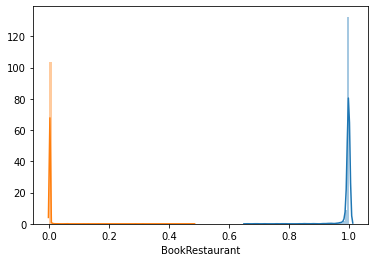

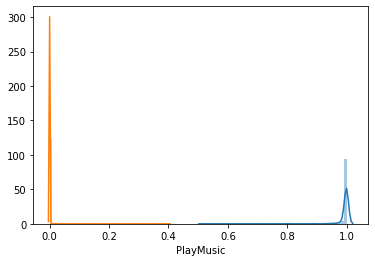

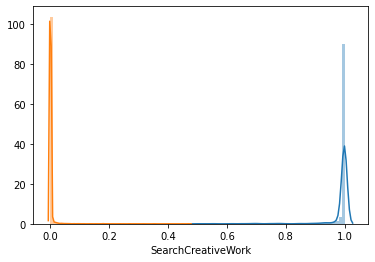

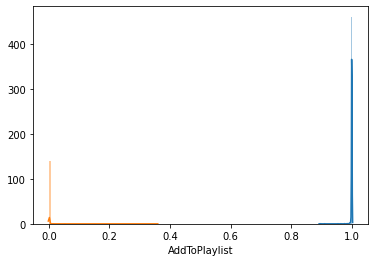

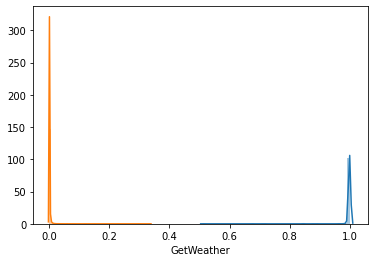

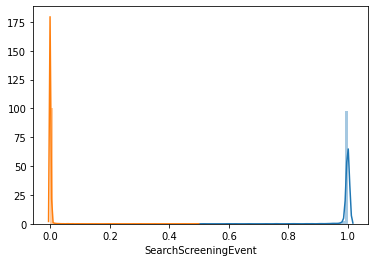

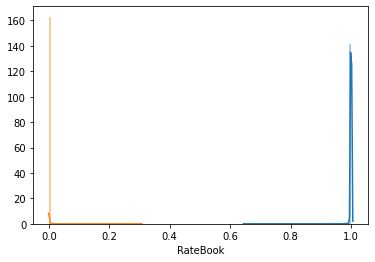

In [11]:
for i in list(set(correct.intent)):
  get_mem_dist(i)

In [17]:
def low_mem_stats(intent):
  mu_low = round(mean(correct[correct.pred_intent != intent][intent]),3)
  variance_low = variance(correct[correct.pred_intent != intent][intent])
  sigma_low = round(math.sqrt(variance_low),3)
  return mu_low, sigma_low

def med_mem_stats(intent):
  mu_low = mean(correct[correct.pred_intent != intent][intent])
  mu_high = mean(correct[correct.pred_intent == intent][intent])
  med_rows = correct[(correct[intent] >= mu_low) & (correct[intent] <= mu_high)][intent]
  mu_med = round(mean(med_rows),3)
  s1 = 0.5*(mu_low+mu_med)
  s2 = 0.5*(mu_high+mu_med)
  core_med_rows = correct[(correct[intent] >= s1) & (correct[intent] <= s2)][intent]
  variance_med = variance(core_med_rows)
  sigma_med = round(math.sqrt(variance_med),3)
  return mu_med, sigma_med

def high_mem_stats(intent):
  mu_high = round(mean(correct[correct.pred_intent == intent][intent]),3)
  variance_high = variance(correct[correct.pred_intent == intent][intent])
  sigma_high = round(math.sqrt(variance_high),3)
  return mu_high, sigma_high

def get_perc_per_set(intent):
    n_low = len(correct[correct.pred_intent != intent][intent])
    p_low = n_low/len(correct)
    n_high = len(correct[correct.pred_intent == intent][intent])
    p_high = n_high/len(correct)
    
    mu_low = mean(correct[correct.pred_intent != intent][intent])
    mu_high = mean(correct[correct.pred_intent == intent][intent])
    med_rows = correct[(correct[intent] >= mu_low) & (correct[intent] <= mu_high)][intent]
    n_med = len(med_rows)
    p_med = n_med/len(correct)
    
    print('p_low:', p_low, ", p_med:", p_med, ", p_high:", p_high)

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def get_fuzzy_lims(intent):
  ##Low
  mu_low, sigma_low = low_mem_stats(intent)

  #High
  mu_high, sigma_high = high_mem_stats(intent)

  #Medium
  mu_med, sigma_med = med_mem_stats(intent)

  print("Low mem:", mu_low, sigma_low)
  print("Medium mem:", mu_med, ",", sigma_med)
  print("High mem:", mu_high, sigma_high)

  return mu_low, sigma_low, mu_med, sigma_med, mu_high, sigma_high


def sigmoid_low(x, slope, mu):
    s = 1 / (1 + np.exp(slope*(x-mu))) 
    return s

def sigmoid_high(x, slope, mu):
    s = 1 / (1 + np.exp(-1*slope*(x-mu))) 
    return s

def gaussian_med(x, mu, sigma):
  g = np.exp((-1*pow((x - mu),2))/(2*pow(sigma,2)))
  return g


def demo_mem_fns_soft(intent):
  mu_low, sigma_low, mu_med, sigma_med, mu_high, sigma_high = get_fuzzy_lims(intent)
  x = np.linspace(0,1,100)
#   plt.plot(x, sigmoid_low(x, slope= 10/(mu_med - mu_low), mu=0.5*(mu_low+mu_med)), color = 'r')
#   plt.plot(x, sigmoid_high(x, slope = 10/(mu_high - mu_med), mu=0.5*(mu_high+mu_med)), color = 'g')
  plt.plot(x, sigmoid_low(x, slope= 10/mu_med, mu=0.5*(mu_low+mu_med)), color = 'r')
  plt.plot(x, sigmoid_high(x, slope = 10/(1-mu_med), mu=0.5*(mu_high+mu_med)), color = 'g')
  plt.plot(x, gaussian_med(x, mu = mu_med, sigma = sigma_med), color = 'b')
  plt.xlabel("softmax scores")
  plt.ylabel("membership degree")
  plt.title(intent)
  plt.show()
    
    
def demo_mem_fns_hard(intent):
  x = np.linspace(0,1,100)
#   plt.plot(x, sigmoid_low(x, slope= 10/(mu_med - mu_low), mu=0.5*(mu_low+mu_med)), color = 'r')
#   plt.plot(x, sigmoid_high(x, slope = 10/(mu_high - mu_med), mu=0.5*(mu_high+mu_med)), color = 'g')
  plt.plot(x, sigmoid_low(x,  slope= 10/0.5, mu=0.25), color = 'r')
  plt.plot(x, sigmoid_high(x, slope = 10/0.5, mu=0.75), color = 'g')
  plt.plot(x, gaussian_med(x, mu = 0.5, sigma = 0.1), color = 'b')
  plt.xlabel("softmax scores")
  plt.ylabel("membership degree")
  plt.title(intent)
  plt.show()

BookRestaurant
p_low: 0.8563505268996118 , p_med: 0.06378258458125347 , p_high: 0.14364947310038825
Low mem: 0.0 0.007
Medium mem: 0.345 , 0.174
High mem: 0.995 0.02


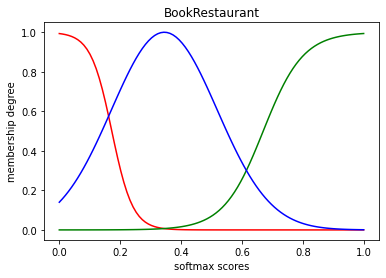

PlayMusic
p_low: 0.8550332778702163 , p_med: 0.042914586799778144 , p_high: 0.1449667221297837
Low mem: 0.0 0.008
Medium mem: 0.395 , 0.176
High mem: 0.994 0.032


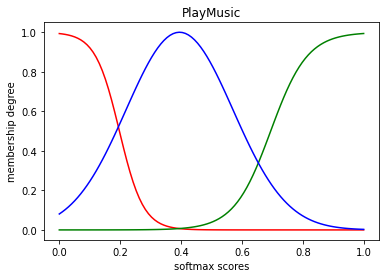

SearchCreativeWork
p_low: 0.8591236827509706 , p_med: 0.06773433166943982 , p_high: 0.1408763172490294
Low mem: 0.002 0.015
Medium mem: 0.23 , 0.126
High mem: 0.991 0.042


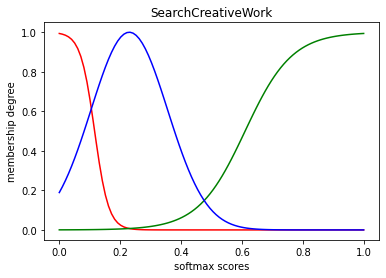

AddToPlaylist
p_low: 0.8585690515806988 , p_med: 0.08929561841375486 , p_high: 0.14143094841930118
Low mem: 0.0 0.004
Medium mem: 0.178 , 0.147
High mem: 0.999 0.004


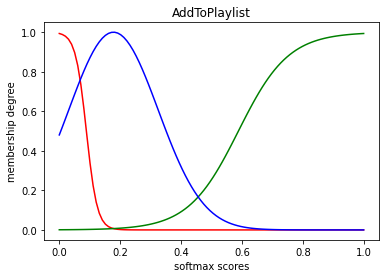

GetWeather
p_low: 0.8548946200776484 , p_med: 0.09865501941209096 , p_high: 0.14510537992235165
Low mem: 0.001 0.007
Medium mem: 0.067 , 0.101
High mem: 0.999 0.017


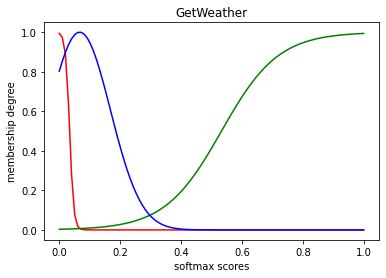

SearchScreeningEvent
p_low: 0.8584997226844149 , p_med: 0.05116472545757072 , p_high: 0.14150027731558515
Low mem: 0.001 0.013
Medium mem: 0.259 , 0.147
High mem: 0.996 0.025


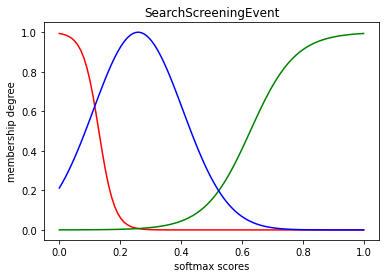

RateBook
p_low: 0.8575291181364393 , p_med: 0.09179145867997782 , p_high: 0.14247088186356074
Low mem: 0.0 0.003
Medium mem: 0.126 , 0.161
High mem: 0.999 0.008


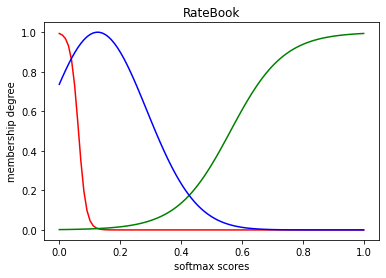

In [18]:
for i in list(set(full_data.intent_label)):
    print(i)
    get_perc_per_set(i)
    demo_mem_fns_soft(i)

RateBook


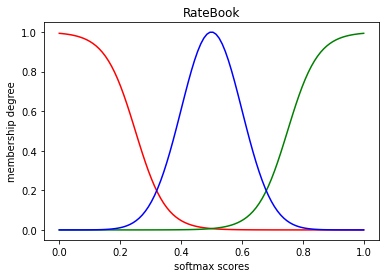

BookRestaurant


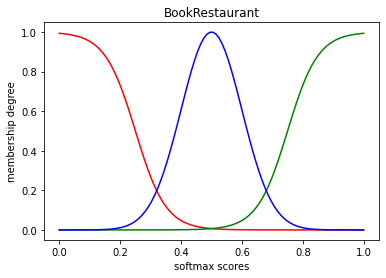

SearchCreativeWork


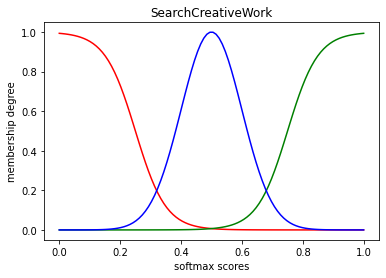

AddToPlaylist


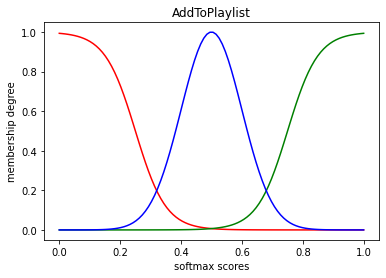

SearchScreeningEvent


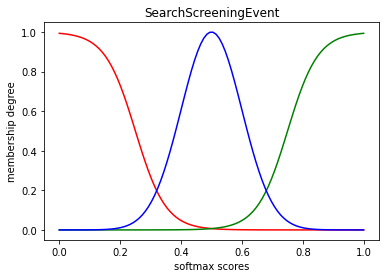

GetWeather


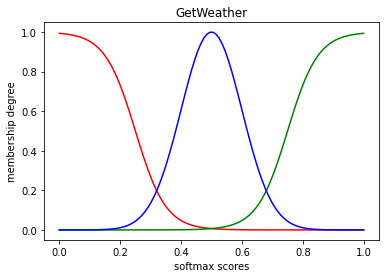

PlayMusic


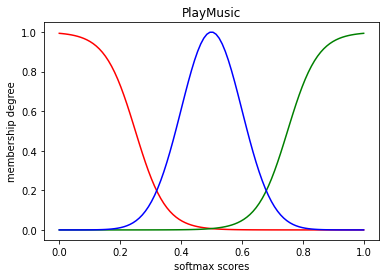

In [27]:
for i in list(set(full_data.intent_label)):
    print(i)
    demo_mem_fns_hard(i)

In [28]:
low_mem = {}
medium_mem = {}
high_mem = {}

for i in list(set(correct.intent)):
  low_mem[i] = low_mem_stats(i)
  medium_mem[i] = med_mem_stats(i)
  high_mem[i] = high_mem_stats(i)

In [29]:
def get_membership_demo_soft(value, intent):

  mu_low = low_mem[intent][0]
  mu_med, sigma_med = medium_mem[intent]
  mu_high = high_mem[intent][0]

  #Low
  mem_low = sigmoid_low(value, slope= 10/mu_med, mu=0.5*(mu_low+mu_med))
  #Medium
  mem_med = gaussian_med(value, mu = mu_med, sigma = sigma_med)
  #High
  mem_high = sigmoid_high(value, slope = 10/(1-mu_med), mu=0.5*(mu_high+mu_med))

  print("Low:", mem_low)
  print("Medium:", mem_med)
  print("High:", mem_high)

  # return mem_low, mem_med, mem_high

In [30]:
def get_membership_demo_hard(value, intent):

  #Low
  mem_low = sigmoid_low(value, slope= 10/0.5, mu=0.25)
  #Medium
  mem_med = gaussian_med(value, mu = 0.5, sigma = 0.1)
  #High
  mem_high = sigmoid_high(value, slope = 10/0.5, mu=0.75)

  print("Low:", mem_low)
  print("Medium:", mem_med)
  print("High:", mem_high)

  # return mem_low, mem_med, mem_high

In [31]:
def get_membership_soft(value, intent):

  mu_low = low_mem[intent][0]
  mu_med, sigma_med = medium_mem[intent]
  mu_high = high_mem[intent][0]

  #Low
  mem_low = sigmoid_low(value, slope= 10/mu_med, mu=0.5*(mu_low+mu_med))
  #Medium
  mem_med = gaussian_med(value, mu = mu_med, sigma = sigma_med)
  #High
  mem_high = sigmoid_high(value, slope = 10/(1-mu_med), mu=0.5*(mu_high+mu_med))

  return mem_low, mem_med, mem_high

In [32]:
def get_membership_hard(value, intent):

  #Low
  mem_low = sigmoid_low(value, slope= 10/0.5, mu=0.25)
  #Medium
  mem_med = gaussian_med(value, mu = 0.5, sigma = 0.1)
  #High
  mem_high = sigmoid_high(value, slope = 10/0.5, mu=0.75)

  return mem_low, mem_med, mem_high

In [33]:
get_membership_demo_soft(0.4, 'BookRestaurant')

Low: 0.0013664075076856863
Medium: 0.9512702695529317
High: 0.01595126315176054


In [34]:
get_membership_demo_hard(0.4, 'BookRestaurant')

Low: 0.04742587317756677
Medium: 0.6065306597126336
High: 0.0009110511944006454


In [35]:
correct_hard = correct.copy()

In [36]:
correct[['AddToPlaylist_low']] = [get_membership_soft(x, 'AddToPlaylist')[0] for x in correct['AddToPlaylist']]
correct[['AddToPlaylist_med']] = [get_membership_soft(x, 'AddToPlaylist')[1] for x in correct['AddToPlaylist']]
correct[['AddToPlaylist_high']] = [get_membership_soft(x, 'AddToPlaylist')[2] for x in correct['AddToPlaylist']]

correct[['BookRestaurant_low']] = [get_membership_soft(x, 'BookRestaurant')[0] for x in correct['BookRestaurant']]
correct[['BookRestaurant_med']] = [get_membership_soft(x, 'BookRestaurant')[1] for x in correct['BookRestaurant']]
correct[['BookRestaurant_high']] = [get_membership_soft(x, 'BookRestaurant')[2] for x in correct['BookRestaurant']]

correct[['GetWeather_low']] = [get_membership_soft(x, 'GetWeather')[0] for x in correct['GetWeather']]
correct[['GetWeather_med']] = [get_membership_soft(x, 'GetWeather')[1] for x in correct['GetWeather']]
correct[['GetWeather_high']] = [get_membership_soft(x, 'GetWeather')[2] for x in correct['GetWeather']]

correct[['PlayMusic_low']] = [get_membership_soft(x, 'PlayMusic')[0] for x in correct['PlayMusic']]
correct[['PlayMusic_med']] = [get_membership_soft(x, 'PlayMusic')[1] for x in correct['PlayMusic']]
correct[['PlayMusic_high']] = [get_membership_soft(x, 'PlayMusic')[2] for x in correct['PlayMusic']]

correct[['RateBook_low']] = [get_membership_soft(x, 'RateBook')[0] for x in correct['RateBook']]
correct[['RateBook_med']] = [get_membership_soft(x, 'RateBook')[1] for x in correct['RateBook']]
correct[['RateBook_high']] = [get_membership_soft(x, 'RateBook')[2] for x in correct['RateBook']]

correct[['SearchCreativeWork_low']] = [get_membership_soft(x, 'SearchCreativeWork')[0] for x in correct['SearchCreativeWork']]
correct[['SearchCreativeWork_med']] = [get_membership_soft(x, 'SearchCreativeWork')[1] for x in correct['SearchCreativeWork']]
correct[['SearchCreativeWork_high']] = [get_membership_soft(x, 'SearchCreativeWork')[2] for x in correct['SearchCreativeWork']]

correct[['SearchScreeningEvent_low']] = [get_membership_soft(x, 'SearchScreeningEvent')[0] for x in correct['SearchScreeningEvent']]
correct[['SearchScreeningEvent_med']] = [get_membership_soft(x, 'SearchScreeningEvent')[1] for x in correct['SearchScreeningEvent']]
correct[['SearchScreeningEvent_high']] = [get_membership_soft(x, 'SearchScreeningEvent')[2] for x in correct['SearchScreeningEvent']]

In [28]:
correct.to_csv('./results/softmax_data/SI_softmax_SNIPS.csv')

In [38]:
correct_hard[['AddToPlaylist_low']] = [get_membership_hard(x, 'AddToPlaylist')[0] for x in correct_hard['AddToPlaylist']]
correct_hard[['AddToPlaylist_med']] = [get_membership_hard(x, 'AddToPlaylist')[1] for x in correct_hard['AddToPlaylist']]
correct_hard[['AddToPlaylist_high']] = [get_membership_hard(x, 'AddToPlaylist')[2] for x in correct_hard['AddToPlaylist']]

correct_hard[['BookRestaurant_low']] = [get_membership_hard(x, 'BookRestaurant')[0] for x in correct_hard['BookRestaurant']]
correct_hard[['BookRestaurant_med']] = [get_membership_hard(x, 'BookRestaurant')[1] for x in correct_hard['BookRestaurant']]
correct_hard[['BookRestaurant_high']] = [get_membership_hard(x, 'BookRestaurant')[2] for x in correct_hard['BookRestaurant']]

correct_hard[['GetWeather_low']] = [get_membership_hard(x, 'GetWeather')[0] for x in correct_hard['GetWeather']]
correct_hard[['GetWeather_med']] = [get_membership_hard(x, 'GetWeather')[1] for x in correct_hard['GetWeather']]
correct_hard[['GetWeather_high']] = [get_membership_hard(x, 'GetWeather')[2] for x in correct_hard['GetWeather']]

correct_hard[['PlayMusic_low']] = [get_membership_hard(x, 'PlayMusic')[0] for x in correct_hard['PlayMusic']]
correct_hard[['PlayMusic_med']] = [get_membership_hard(x, 'PlayMusic')[1] for x in correct_hard['PlayMusic']]
correct_hard[['PlayMusic_high']] = [get_membership_hard(x, 'PlayMusic')[2] for x in correct_hard['PlayMusic']]

correct_hard[['RateBook_low']] = [get_membership_hard(x, 'RateBook')[0] for x in correct_hard['RateBook']]
correct_hard[['RateBook_med']] = [get_membership_hard(x, 'RateBook')[1] for x in correct_hard['RateBook']]
correct_hard[['RateBook_high']] = [get_membership_hard(x, 'RateBook')[2] for x in correct_hard['RateBook']]

correct_hard[['SearchCreativeWork_low']] = [get_membership_hard(x, 'SearchCreativeWork')[0] for x in correct_hard['SearchCreativeWork']]
correct_hard[['SearchCreativeWork_med']] = [get_membership_hard(x, 'SearchCreativeWork')[1] for x in correct_hard['SearchCreativeWork']]
correct_hard[['SearchCreativeWork_high']] = [get_membership_hard(x, 'SearchCreativeWork')[2] for x in correct_hard['SearchCreativeWork']]

correct_hard[['SearchScreeningEvent_low']] = [get_membership_hard(x, 'SearchScreeningEvent')[0] for x in correct_hard['SearchScreeningEvent']]
correct_hard[['SearchScreeningEvent_med']] = [get_membership_hard(x, 'SearchScreeningEvent')[1] for x in correct_hard['SearchScreeningEvent']]
correct_hard[['SearchScreeningEvent_high']] = [get_membership_hard(x, 'SearchScreeningEvent')[2] for x in correct_hard['SearchScreeningEvent']]

In [ ]:
correct_hard.to_csv('./results/softmax_data/SI_hardmax_SNIPS.csv')